# Import Libraries & Datasets


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [22]:
# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])

# Predict the labels for the training data X
y_pred = knn.predict(X_new)
print(f"Prediction: {y_pred}")

Prediction: [0 1 0]


# Train/Test split


In [23]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
# Stratification is important for classification problems

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.863568215892054


# Overfitting & Underfitting


In [24]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

maximum_accuracy = 0
best_k = 0

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

    if test_accuracies[neighbor] > maximum_accuracy:
        maximum_accuracy = test_accuracies[neighbor]
        best_k = neighbor

print(f"Best k = {best_k}")

Best k = 7


# Visualizing model complexity


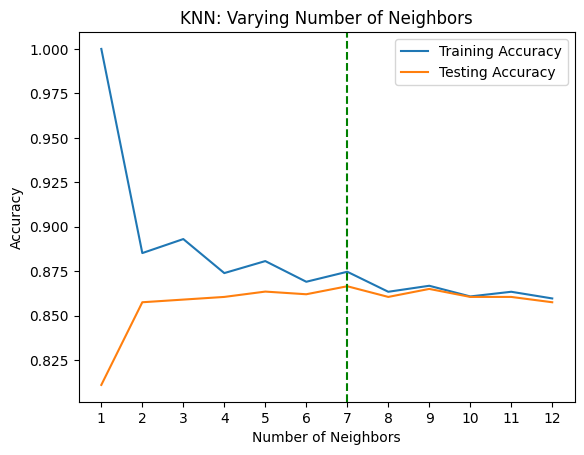

In [25]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.axvline(x=best_k, color="green", linestyle="--")
plt.xticks(neighbors)

# Display the plot
plt.show()

## Performance Evaluation using `Confusion Matrix`


In [26]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[569   1]
 [ 91   6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       570
           1       0.86      0.06      0.12        97

    accuracy                           0.86       667
   macro avg       0.86      0.53      0.52       667
weighted avg       0.86      0.86      0.81       667

